In [1]:
## 工作包准备，numpy和pandas是常用的数据分析第三方包
import numpy as np
import pandas as pd 
from scipy.stats import chi2

In [2]:
## 利用pandas自带的read_csv导入数据，导入的数据会转化为pandas数据格式，dataframe类型
train = pd.read_csv('./MicroSynFinal.csv')

In [3]:
#### 对数据集进行描述性统计分析 ###

numerical = ['Collateral_valuation',
             'Age',
             'Properties_Total',
             'Amount',
             'Term',
             'Historic_Loans',
             'Current_Loans',
             'Max_Arrears']

categorical = ['Region',
               'Area',
               'Activity',
               'Properties_Status']

binaray = ['Guarantor',
           'Collateral']

In [4]:
### 将目标变量单独赋值给一个变量
target_var = ['Defaulter']

train_X = train[numerical + categorical + binaray]
train_Y = train[target_var]

train_X.describe()

,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Region,Area,Activity,Guarantor,Collateral
count,28463.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,38523.000000,50000.000000,50000.000000,50000.000000,47422.000000,50000.000000,50000.000000
mean,6399.752415,41.128860,1.992360,8580.784360,26.199240,4.261880,1.797679,58.077620,9.134600,35.360280,8.936527,0.086540,0.569260
std,8155.521062,10.443382,1.175521,10088.501785,11.511816,3.728208,1.147399,205.871957,2.522406,24.703517,7.017887,0.281163,0.495185
min,10.000000,18.000000,1.000000,1137.000000,11.000000,1.000000,1.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000
25%,1923.000000,33.000000,1.000000,3002.000000,21.000000,2.000000,1.000000,0.000000,8.000000,15.000000,1.000000,0.000000,0.000000
50%,3768.000000,41.000000,2.000000,5500.000000,23.000000,3.000000,1.000000,0.000000,9.000000,30.000000,10.000000,0.000000,1.000000
75%,7589.500000,49.000000,2.000000,9912.250000,34.000000,6.000000,2.000000,24.000000,10.000000,50.000000,14.000000,0.000000,1.000000
max,137618.000000,80.000000,15.000000,134750.000000,69.000000,38.000000,12.000000,3483.000000,15.000000,95.000000,19.000000,1.000000,1.000000


In [5]:
train_X.columns

Index(['Collateral_valuation', 'Age', 'Properties_Total', 'Amount', 'Term',
       'Historic_Loans', 'Current_Loans', 'Max_Arrears', 'Region', 'Area',
       'Activity', 'Properties_Status', 'Guarantor', 'Collateral'],
      dtype='object')

In [6]:
### 首先将类别变量转换为虚拟变量，方便之后做数据探索
dummy_region = pd.get_dummies(train_X["Region"],prefix='Region')
dummy_region_col = list(dummy_region.columns)
dummy_area = pd.get_dummies(train_X["Area"],prefix='Area')
dummy_area_col = list(dummy_area.columns)
dummy_activity = pd.get_dummies(train_X["Activity"],prefix='Activity', dummy_na=True)
dummy_activity_col = list(dummy_activity.columns)
dummy_status = pd.get_dummies(train_X["Properties_Status"],prefix='PropertiesStatus')
dummy_status_col = list(dummy_status.columns)
dummy_col_dict = {"Region":dummy_region_col, "Area":dummy_area_col, "Activity":dummy_activity_col, "Properties_Status":dummy_status_col}

In [8]:
dummy_region

,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Region_10,Region_11,Region_12,Region_13,Region_14,Region_15
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
49997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
### 分别取自变量数据集和目标变量数据集
train_X = pd.concat([train[numerical+binaray],dummy_region, dummy_area, dummy_activity, dummy_status], axis=1)
train_Y = train[target_var]

train = pd.concat([train_X, train_Y], axis=1)

In [10]:
### 对数据集做描述性分析
train_X.describe()

,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Guarantor,Collateral,...,Activity_15.0,Activity_16.0,Activity_17.0,Activity_18.0,Activity_19.0,Activity_nan,PropertiesStatus_A,PropertiesStatus_B,PropertiesStatus_C,PropertiesStatus_D
count,28463.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,38523.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,6399.752415,41.128860,1.992360,8580.784360,26.199240,4.261880,1.797679,58.077620,0.086540,0.569260,...,0.002040,0.000620,0.030360,0.06984,0.077780,0.051560,0.121360,0.639960,0.016820,0.221860
std,8155.521062,10.443382,1.175521,10088.501785,11.511816,3.728208,1.147399,205.871957,0.281163,0.495185,...,0.045121,0.024892,0.171578,0.25488,0.267828,0.221139,0.326548,0.480016,0.128598,0.415502
min,10.000000,18.000000,1.000000,1137.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1923.000000,33.000000,1.000000,3002.000000,21.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3768.000000,41.000000,2.000000,5500.000000,23.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7589.500000,49.000000,2.000000,9912.250000,34.000000,6.000000,2.000000,24.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,137618.000000,80.000000,15.000000,134750.000000,69.000000,38.000000,12.000000,3483.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
### 基于target变量，分别进行describe
train[train['Defaulter']==0].describe()
train[train['Defaulter']==1].describe()

,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Guarantor,Collateral,...,Activity_16.0,Activity_17.0,Activity_18.0,Activity_19.0,Activity_nan,PropertiesStatus_A,PropertiesStatus_B,PropertiesStatus_C,PropertiesStatus_D,Defaulter
count,4024.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,6532.000000,8219.000000,8219.000000,8219.000000,...,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.000000,8219.0
mean,9684.551690,38.578051,1.740966,11636.178002,31.566736,3.314880,1.818585,134.711157,0.083587,0.489597,...,0.000973,0.012289,0.058036,0.115099,0.050736,0.185911,0.550189,0.028471,0.235430,1.0
std,11488.015293,10.714466,1.088420,12224.974714,13.411274,2.931627,1.183386,399.384840,0.276784,0.499922,...,0.031185,0.110177,0.233826,0.319161,0.219472,0.389058,0.497505,0.166323,0.424293,0.0
min,55.000000,18.000000,1.000000,1138.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2760.000000,30.000000,1.000000,4029.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5833.000000,38.000000,1.000000,7771.000000,31.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,12312.000000,46.000000,2.000000,14260.000000,46.000000,4.000000,2.000000,39.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,137618.000000,78.000000,12.000000,132168.000000,68.000000,33.000000,10.000000,3483.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [13]:
## 数据探索--协方差和相关矩阵

train.cov()
train.corr()

,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Guarantor,Collateral,...,Activity_16.0,Activity_17.0,Activity_18.0,Activity_19.0,Activity_nan,PropertiesStatus_A,PropertiesStatus_B,PropertiesStatus_C,PropertiesStatus_D,Defaulter
Collateral_valuation,1.000000,0.005271,0.027913,0.861723,0.253943,0.026257,0.065811,0.049739,0.061548,NaN,...,-0.000648,-0.019159,0.149736,0.098418,-0.003629,0.101136,0.007121,0.009624,-0.085874,0.163438
Age,0.005271,1.000000,-0.030268,0.015961,-0.051014,0.100147,0.007141,0.009284,-0.029750,0.035300,...,-0.004770,-0.016013,0.089490,-0.003684,0.000293,-0.264922,0.294519,-0.065502,-0.111770,-0.108333
Properties_Total,0.027913,-0.030268,1.000000,0.024755,0.022408,0.191060,0.100672,-0.006005,-0.043142,0.015202,...,0.005630,0.010868,-0.002758,0.017515,-0.002178,0.058686,-0.172777,0.052052,0.137371,-0.094853
Amount,0.861723,0.015961,0.024755,1.000000,0.174703,0.058833,0.061542,0.053929,0.030750,0.000741,...,-0.001087,-0.017121,0.291805,0.017908,-0.008135,0.080397,0.008910,0.006309,-0.075431,0.134327
Term,0.253943,-0.051014,0.022408,0.174703,1.000000,-0.068728,0.011562,0.009739,-0.009208,-0.110116,...,0.001104,0.025098,-0.078006,0.154072,-0.008954,0.045218,-0.080584,0.027580,0.049022,0.206801
Historic_Loans,0.026257,0.100147,0.191060,0.058833,-0.068728,1.000000,0.486670,0.051815,-0.012729,0.119842,...,0.010319,0.032719,0.021732,-0.046299,-0.001119,-0.024742,0.007101,-0.006351,0.013208,-0.112661
Current_Loans,0.065811,0.007141,0.100672,0.061542,0.011562,0.486670,1.000000,0.028278,-0.006956,0.036976,...,-0.001038,-0.018665,-0.025786,-0.002007,-0.001001,0.003208,-0.011656,0.012166,0.007157,0.008233
Max_Arrears,0.049739,0.009284,-0.006005,0.053929,0.009739,0.051815,0.028278,1.000000,0.007854,-0.002365,...,-0.002261,-0.012128,0.075518,-0.004715,-0.002784,0.031327,-0.021504,0.020362,-0.006080,0.165100
Guarantor,0.061548,-0.029750,-0.043142,0.030750,-0.009208,-0.012729,-0.006956,0.007854,1.000000,-0.238778,...,0.006622,0.101008,-0.006195,-0.019005,0.000289,0.034827,-0.034693,-0.002644,0.013527,-0.004659
Collateral,NaN,0.035300,0.015202,0.000741,-0.110116,0.119842,0.036976,-0.002365,-0.238778,1.000000,...,-0.001050,0.024920,-0.156859,-0.129670,0.000447,-0.052229,0.054593,-0.053314,-0.005521,-0.071353


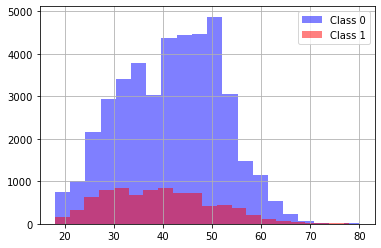

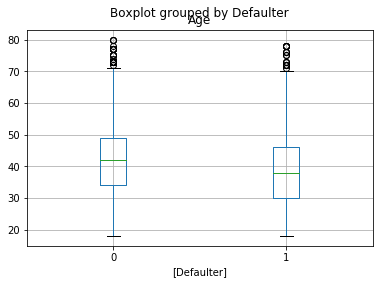

In [14]:
### 绘制直方图和箱形图

from matplotlib import pyplot as plt
plt.hist(train[train['Defaulter']==0]['Age'],color='blue',label='Class 0',alpha=0.5,bins=20)
plt.hist(train[train['Defaulter']==1]['Age'],color='red',label='Class 1',alpha=0.5,bins=20)

plt.legend(loc='best')
plt.grid()
plt.show()

train[['Defaulter', 'Age']].boxplot(by='Defaulter',layout=(1,1))
plt.show()

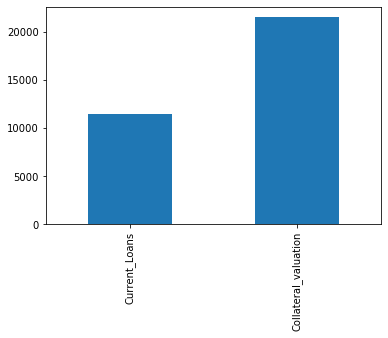

In [15]:
## 首先做缺失值处理
missing = train_X.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [19]:
## 两列缺失值，一列是当前在还贷款总额，一列是抵押物价值，从数据看出，抵押物价值为空，就是没有抵押物的意思，已有是否有抵押物表示，这列变量不用对空值处理
### 一列是当前在还贷款总额，如果为空，则表示当前没有在还贷款，遵循空值即信息的原则
train_X.loc[train_X['Current_Loans'].isnull(), 'Current_Loans_nan'] = 1
train_X.loc[train_X['Current_Loans_nan'].isnull(), 'Current_Loans_nan'] = 0

binaray = binaray + ["Current_Loans_nan"]

train = pd.concat([train_X, train_Y], axis=1)

In [ ]:
## 两列缺失值，一列是当前在还贷款总额，一列是抵押物价值，从数据看出，抵押物价值为空，就是没有抵押物的意思，已有是否有抵押物表示，这列变量不用对空值处理
### 一列是当前在还贷款总额，如果为空，则表示当前没有在还贷款，遵循空值即信息的原则
train_X.loc[train_X['Current_Loans'].isnull(), 'Current_Loans_nan'] = 1
train_X.loc[train_X['Current_Loans_nan'].isnull(), 'Current_Loans_nan'] = 0

binaray = binaray + ["Current_Loans_nan"]

train = pd.concat([train_X, train_Y], axis=1)

In [20]:
### 将方差较小的变量，直接选择进行剔除,阈值选择0.001 ##
## 针对数值变量做方差筛选
drop_col = list()
for col in numerical:
    col_var = train_X[col].var()
    if col_var < 0.001:
        drop_col.append(col)
        train_X.drop(axis=1, columns=col, inplace=True)

numerical = list(set(numerical).difference(set(drop_col)))
train = pd.concat([train_X, train_Y], axis=1)

In [33]:
## chi2分箱主流程
# 1：计算初始chi2 result
## 合并X数据集与Y数据集

### 先对数据进行等频分箱，提高卡方分箱的效率

## 注意对原始数据的拷贝
import copy
chi_train_X = copy.deepcopy(train_X)

In [39]:
## 自写卡方最优分箱过程
def get_chi2(X, col):
    '''
    计算卡方统计量
    '''
    # 计算样本期望频率
    
    pos_cnt = X['Defaulter'].sum()
    all_cnt = X['Defaulter'].count()
    expected_ratio = float(pos_cnt) / all_cnt 
    
    # 对变量按属性值从大到小排序
    df = X[[col, 'Defaulter']]
    df = df.dropna()
    col_value = list(set(df[col]))
    col_value.sort()
    
    # 计算每一个区间的卡方统计量
    
    chi_list = []
    pos_list = []
    expected_pos_list = []
    
    for value in col_value:
        df_pos_cnt = df.loc[df[col] == value, 'Defaulter'].sum()
        df_all_cnt = df.loc[df[col] == value,'Defaulter'].count()
        
        expected_pos_cnt = df_all_cnt * expected_ratio
        chi_square = (df_pos_cnt - expected_pos_cnt)**2 / expected_pos_cnt
        chi_list.append(chi_square)
        pos_list.append(df_pos_cnt)
        expected_pos_list.append(expected_pos_cnt)
    
    # 导出结果到dataframe
    chi_result = pd.DataFrame({col: col_value, 'chi_square':chi_list,
                               'pos_cnt':pos_list, 'expected_pos_cnt':expected_pos_list})
    return chi_result

def chiMerge_chisqure(chi_result, dfree=4, cf=0.1, maxInterval=5):

    threshold = cal_chisqure_threshold(dfree, cf)
    
    min_chiSquare = chi_result['chi_square'].min()
    
    group_cnt = len(chi_result)
    
    
    # 如果变量区间的最小卡方值小于阈值，则继续合并直到最小值大于等于阈值
    
    while(min_chiSquare < threshold and group_cnt > maxInterval):
        min_index = chi_result[chi_result['chi_square']==chi_result['chi_square'].min()].index.tolist()[0]
        
        # 如果分箱区间在最前,则向下合并
        if min_index == 0:
            chi_result = merge_chiSquare(chi_result, min_index+1, min_index)
        
        # 如果分箱区间在最后，则向上合并
        elif min_index == group_cnt-1:
            chi_result = merge_chiSquare(chi_result, min_index-1, min_index)
        
        # 如果分箱区间在中间，则判断与其相邻的最小卡方的区间，然后进行合并
        else:
            if chi_result.loc[min_index-1, 'chi_square'] > chi_result.loc[min_index+1, 'chi_square']:
                chi_result = merge_chiSquare(chi_result, min_index, min_index+1)
            else:
                chi_result = merge_chiSquare(chi_result, min_index-1, min_index)
        
        min_chiSquare = chi_result['chi_square'].min()
        
        group_cnt = len(chi_result)

    
    return chi_result

def cal_chisqure_threshold(dfree=4, cf=0.1):
    '''
    根据给定的自由度和显著性水平, 计算卡方阈值
    '''
    percents = [0.95, 0.90, 0.5, 0.1, 0.05, 0.025, 0.01, 0.005]
    
    ## 计算每个自由度，在每个显著性水平下的卡方阈值
    df = pd.DataFrame(np.array([chi2.isf(percents, df=i) for i in range(1, 30)]))
    df.columns = percents
    df.index = df.index+1
    
    pd.set_option('precision', 3)
    return df.loc[dfree, cf]

def merge_chiSquare(chi_result, index, mergeIndex, a = 'expected_pos_cnt',
                    b = 'pos_cnt', c = 'chi_square'):
    '''
    按index进行合并，并计算合并后的卡方值
    mergeindex 是合并后的序列值
    
    '''
    chi_result.loc[mergeIndex, a] = chi_result.loc[mergeIndex, a] + chi_result.loc[index, a]
    chi_result.loc[mergeIndex, b] = chi_result.loc[mergeIndex, b] + chi_result.loc[index, b]
    ## 两个区间合并后，新的chi2值如何计算
    chi_result.loc[mergeIndex, c] = (chi_result.loc[mergeIndex, b] - chi_result.loc[mergeIndex, a])**2 /chi_result.loc[mergeIndex, a]
    
    chi_result = chi_result.drop([index])
    
    ## 重置index
    chi_result = chi_result.reset_index(drop=True)
    
    return chi_result

In [44]:
## 对数据进行卡方分箱，按照自由度进行分箱

chi_result_all = dict()

for col in chi_train_X.columns:
    print("start get " + col + " chi2 result")
    chi2_result = get_chi2(train, col)
    chi2_merge = chiMerge_chisqure(chi2_result, dfree=4, cf=0.05, maxInterval=5)
    
    chi_result_all[col] = chi2_merge

start get Collateral_valuation chi2 result
start get Age chi2 result
start get Properties_Total chi2 result
start get Amount chi2 result
start get Term chi2 result
start get Historic_Loans chi2 result
start get Current_Loans chi2 result
start get Max_Arrears chi2 result
start get Guarantor chi2 result
start get Collateral chi2 result
start get Region_1 chi2 result
start get Region_2 chi2 result
start get Region_3 chi2 result
start get Region_4 chi2 result
start get Region_5 chi2 result
start get Region_6 chi2 result
start get Region_7 chi2 result
start get Region_8 chi2 result
start get Region_9 chi2 result
start get Region_10 chi2 result
start get Region_11 chi2 result
start get Region_12 chi2 result
start get Region_13 chi2 result
start get Region_14 chi2 result
start get Region_15 chi2 result
start get Area_5 chi2 result
start get Area_10 chi2 result
start get Area_15 chi2 result
start get Area_20 chi2 result
start get Area_25 chi2 result
start get Area_30 chi2 result
start get Area

In [46]:
for col in chi_train_X.columns:
    
    ## 首先对特征进行分箱转化
    chi2_merge = chi_result_all[col]
    woe_list, iv_list, iv = get_woevalue(train, col, chi2_merge)
    woe_iv[col] = {'woe_list': woe_list, 'iv_list':iv_list, 'iv': iv, 'value_list':chi_result_all[col][col].values}

NameError: name 'get_woevalue' is not defined